# Homework 3. Ductility and Stress Magnitudes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1. Creep and Stress Relaxation

![ternary_sone_zoback_2014](https://user-images.githubusercontent.com/51282928/80399164-f30e2b80-88e2-11ea-80e1-55c0db81f25d.PNG)

### B.  Calculate the amount of creep strain

Creep strain of Barnett-2 after 1 yr: 0.0004353 , after 100 kyr: 0.0004941 , and after 100 Myr: 0.0005331
Creep strain of Haynesville-1 after 1 yr: 0.0016512 , after 100 kyr: 0.0021518 , and after 100 Myr: 0.0025223
Creep strain of Eagle Ford-1 after 1 yr: 0.0012649 , after 100 kyr: 0.0017461 , and after 100 Myr: 0.0021187


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


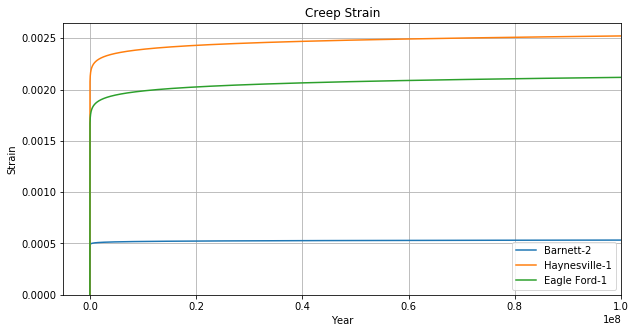

In [2]:
# clay+TOC composition of Barnett-2, Haynessville-1, Eagle Ford 1
Barnett_clay = 0.1 
Haynes_clay = 0.45
Eagle_clay = 0.25

# B (elastic compliance) values, lower values
Barnett_B = 1.2 * 1E-5 # MPa^-1
Haynes_B = 3.7 * 1E-5
Eagle_B = 2.6 * 1E-5

# n (time-dependent creep) values, lower values
Barnett_n = 0.011
Haynes_n = 0.023
Eagle_n = 0.028

diff_stress = 30 # MPa
maxtime = 100 * 1E+6 * (365.25 * 24 * 60 * 60) # 100 million years convert to seconds
seconds = np.arange(0, maxtime + 3.154E+7, 100 * 3.154E+7) # time increment 1 yr
years = seconds / 3.154E+7 # for plotting, simplified back to years

# calculate creep strain
Barnett_creep_strain = diff_stress * Barnett_B * (seconds**Barnett_n)
Haynes_creep_strain = diff_stress * Haynes_B * (seconds**Haynes_n)
Eagle_creep_strain = diff_stress * Eagle_B * (seconds**Eagle_n)

# calculate creep strain particularly for 1 yr, 100 kyr, 100 Myr
yrs = np.array([1, 100*1E+3, 100*1E+6])
secs = yrs * (365.25 * 24 * 60 * 60)

barnett_str = []; haynes_str = []; eagle_str = []
for i in range(len(secs)):
    str_barnett = diff_stress * Barnett_B * (secs[i]**Barnett_n)
    str_haynes = diff_stress * Haynes_B * (secs[i]**Haynes_n)
    str_eagle = diff_stress * Eagle_B * (secs[i]**Eagle_n)
    barnett_str.append(float(str_barnett))
    haynes_str.append(float(str_haynes))
    eagle_str.append(float(str_eagle))
    
print('Creep strain of Barnett-2 after 1 yr:', round(barnett_str[0], 7), ', after 100 kyr:', round(barnett_str[1], 7), ', and after 100 Myr:', round(barnett_str[2], 7))
print('Creep strain of Haynesville-1 after 1 yr:', round(haynes_str[0], 7), ', after 100 kyr:', round(haynes_str[1], 7), ', and after 100 Myr:', round(haynes_str[2], 7))
print('Creep strain of Eagle Ford-1 after 1 yr:', round(eagle_str[0], 7), ', after 100 kyr:', round(eagle_str[1], 7), ', and after 100 Myr:', round(eagle_str[2], 7))

# plot the creep strain
plt.figure(figsize=(10,5))
p1 = plt.plot(years, Barnett_creep_strain)
p2 = plt.plot(years, Haynes_creep_strain)
p3 = plt.plot(years, Eagle_creep_strain)
plt.legend((p1[0], p2[0], p3[0]), (['Barnett-2', 'Haynesville-1', 'Eagle Ford-1']))
plt.title('Creep Strain')
plt.xlabel('Year'); plt.ylabel('Strain')
plt.xlim(xmax=max(years)); plt.ylim(ymin=0)
plt.grid(True)
plt.show()

### D. Calculate creep compliance function J(t)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


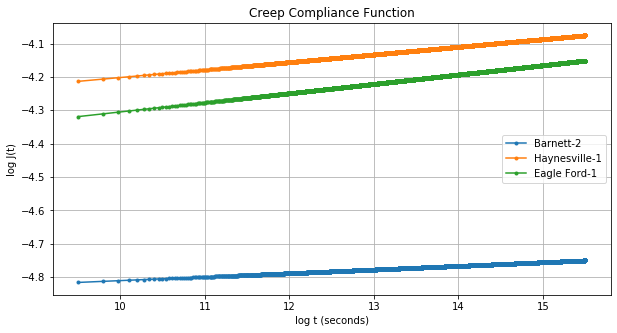

In [3]:
log_Barnett_B = np.log10(Barnett_B)
log_Haynes_B = np.log10(Haynes_B)
log_Eagle_B = np.log10(Eagle_B)
log_seconds = np.log10(seconds) 

log_Barnett_J = log_Barnett_B + Barnett_n * log_seconds
log_Haynes_J = log_Haynes_B + Haynes_n * log_seconds
log_Eagle_J = log_Eagle_B + Eagle_n * log_seconds

# plot the creep compliance function
plt.figure(figsize=(10,5))
p1 = plt.plot(log_seconds, log_Barnett_J, '.-')
p2 = plt.plot(log_seconds, log_Haynes_J, '.-')
p3 = plt.plot(log_seconds, log_Eagle_J, '.-')
# p1 = plt.loglog(seconds, Barnett_creep_strain)
# p2 = plt.loglog(seconds, Haynes_creep_strain)
# p3 = plt.loglog(seconds, Eagle_creep_strain)
plt.legend((p1[0], p2[0], p3[0]), (['Barnett-2', 'Haynesville-1', 'Eagle Ford-1']))
plt.title('Creep Compliance Function')
plt.xlabel('log t (seconds)'); plt.ylabel('log J(t)')
# plt.xlim(xmax=max(years)); plt.ylim(ymin=0)
plt.grid(True)
plt.show()

### E. Calculate the accumulated diﬀerential stress

In [4]:
strain_rate = 1E-19 # 1/s
diff_time = 150 * 1E+6 * (365.25 * 24 * 60 * 60) # differential time in Myr, convert to seconds

Barnett_stress_t = strain_rate * ((diff_time**(1 - Barnett_n)) / (Barnett_B * (1 - Barnett_n)))
Haynes_stress_t = strain_rate * ((diff_time**(1 - Haynes_n)) / (Haynes_B * (1 - Haynes_n)))
Eagle_stress_t = strain_rate * ((diff_time**(1 - Eagle_n)) / (Eagle_B * (1 - Eagle_n)))

print('Accumulated differential stress after 150 Myr in Barnett-2:', round(Barnett_stress_t, 7), 'MPa')
print('Accumulated differential stress after 150 Myr in Haynesville-1:', round(Haynes_stress_t, 7), 'MPa')
print('Accumulated differential stress after 150 Myr in Eagle Ford-1:', round(Eagle_stress_t, 7), 'MPa')

Accumulated differential stress after 150 Myr in Barnett-2: 26.8157866 MPa
Accumulated differential stress after 150 Myr in Haynesville-1: 5.7091236 MPa
Accumulated differential stress after 150 Myr in Eagle Ford-1: 6.8178925 MPa


## Part 2. Effects of Viscoplastic Creep on Stress Magnitudes

### A. Calculate the lower bound on the least principal stress 

In [5]:
# knowns
depth = 9000 # ft
mu = 0.6
Pp_grad = 0.5 # psi/ft
Sv_grad = 1.1 # psi/ft

Pp = depth * Pp_grad
Sv = depth * Sv_grad

# calculate lower bound Shmin
ratio = (np.sqrt((mu**2) + 1) + mu)**2
Sh_lower = ((Sv - Pp) / ratio) + Pp

print('Pore pressure at 9000 ft:', Pp, 'psi')
print('Vertical stress at 9000 ft:', Sv, 'psi')
print('Lower bound of minimum horizontal stress at 9000 ft:', Sh_lower, 'psi')

Pore pressure at 9000 ft: 4500.0 psi
Vertical stress at 9000 ft: 9900.0 psi
Lower bound of minimum horizontal stress at 9000 ft: 6231.086344280491 psi


### B. Calculate total strain

![part2](https://user-images.githubusercontent.com/51282928/80483335-1c30c980-8980-11ea-8c9f-8635190b0493.PNG)

From this equation:
$$S_1-S_3=\epsilon_0 t^{-n} \frac{E}{1-n}$$

Re-arrange to find $\epsilon_0$
$$\epsilon_0=\frac{(S_1-S_3)(1-n)}{E \cdot t^{-n}}$$

In [6]:
# knowns
E = 40 * 145038 # Young's modulus, convert GPa to psi
n = 0.03286 # from the linear fit line (determine first)
time = 100 * 1E+6 * (365.25 * 24 * 60 * 60) # Myr convert to seconds

stress_diff = Sv - Sh_lower # in psi

# calculate total strain
total_strain = (stress_diff * (1 - n)) / (E * (1 / time**n))

print('Total strain of rock sample with 40 GPa Young Modulus at 100 Myr:', round(total_strain, 7))

Total strain of rock sample with 40 GPa Young Modulus at 100 Myr: 0.001976


### C. Calculate Range of Shmin from Creep Relaxation

Re-arrange the above equation to find $S3$:

$$S_3=S_1-(\epsilon_0 t^{-n} \frac{E}{1-n})$$

Stress relaxation causes a decrease of $(S1-S3)$, causing Mohr-Coulomb circle to shrink<br>
<br>
<div>
<img src="https://user-images.githubusercontent.com/51282928/80899427-2cf38d80-8d3a-11ea-8659-f2196527f4ab.jpeg" width="500"/>
</div>

Shrinkage causes the stress polygon (in NF regime) also shrinks. The **upper bound of Shmin** remains ($Sh_{upper}=Sv$) and the **lower bound of Shmin** increases to a new value evolving in time<br>
<br>
<div>
<img src="https://user-images.githubusercontent.com/51282928/80899379-98892b00-8d39-11ea-88e2-3e0540356411.jpeg" width="500"/>
</div>

In [39]:
# upper bound of Shmin

print('Upper bound of Shmin', Sv, 'psi')

Upper bound of Shmin 9900.0 psi


In [40]:
# lower bound of Shmin (using n value from chart given in handout)

n_lower = 0.0422 # from the lower bound line (determine first), my value was 0.01286

Sh_lower_n = Sv - ((total_strain * (1 / (time**n_lower))) * (E / (1 - n_lower)))

print('Minimum horizontal stress at lower bound of n', n_lower, 'is:', Sh_lower_n, 'psi')

Minimum horizontal stress at lower bound of n 0.0422 is: 7347.543351931203 psi


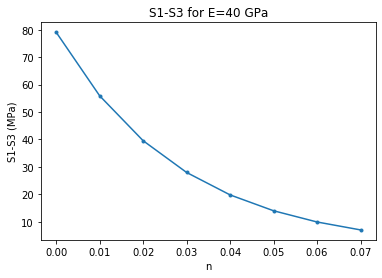

68.27586206896552


In [8]:
n_arr = np.arange(0, 0.08, 0.01)
s_diff = (((total_strain * (1 / (time**n_arr))) * (E / (1 - n_arr)))) / 145

plt.plot(n_arr, s_diff, '.-')
plt.title('S1-S3 for E=40 GPa')
plt.xlabel('n')
plt.ylabel('S1-S3 (MPa)')
plt.show()

print(Sv / 145)

## Part 3. Vertical growth of hydraulic fractures in layered media

No calculations in this part. Directly go to Q6 to answer the theoretical questions.

![stress profile part 3](https://user-images.githubusercontent.com/51282928/80795491-d87bd100-8bc6-11ea-8de8-89fcd25d815e.PNG)

In [9]:
print('Layer from the lowest Shmin to the highest: B, C, A, D, E')
print('Layer from the lowest differential stress to the highest: E, D, A, C, B')
print('Layer from the least ductile to most ductile: B, C, A, D, E')

Layer from the lowest Shmin to the highest: B, C, A, D, E
Layer from the lowest differential stress to the highest: E, D, A, C, B
Layer from the least ductile to most ductile: B, C, A, D, E


## Question

### Q1

How does power law parameter B correlate with clay + TOC?

In [10]:
print('B increases as clay + TOC increases')

B increases as clay + TOC increases


How does power law parameter B correlate with elastic stiffness (Young's modulus)?

In [11]:
print('B is approximately equal to the inverse of elastic stiffness')

B is approximately equal to the inverse of elastic stiffness


How does power law parameter n correlate with clay + kTOC?

In [12]:
print('n does not vary systematically with clay + TOC')

n does not vary systematically with clay + TOC


### Q2 (Refer to Part 1)

How much creep strain occurs in the Haynesville-1 sample after one year?

In [13]:
print('Creep strain of Haynesville-1 after 1 yr:', round(haynes_str[0], 7))

Creep strain of Haynesville-1 after 1 yr: 0.0016512


How much creep strain occurs in the Eagle Ford-1 sample after 100 thousand years?

In [14]:
print('Creep strain of Eagle Ford-1 after 100 kyr:', round(eagle_str[1], 7))

Creep strain of Eagle Ford-1 after 100 kyr: 0.0017461


How much creep strain occurs in the Barnett-2 sample after 100 million years?

In [15]:
print('Creep strain of Barnett-2 after 100 Myr:', round(barnett_str[2], 7))

Creep strain of Barnett-2 after 100 Myr: 0.0005331


For these samples, how does creep strain correlate with clay + TOC?

In [16]:
print('Creep strain increases as clay + TOC increases')

Creep strain increases as clay + TOC increases


### Q3

If plotting log J(t) vs. log t results in a line with a y-intercept of -4.4318, what is the value of power law parameter B in units of 1/MPa?

$$log(J(t))=log(B) + n \cdot log(t)$$

In [17]:
log_B = -4.4318
print('Value of B:', 10**log_B)

Value of B: 3.699985311728596e-05


If the slope of this line is 0.028, what is the value of power law parameter n?

In [18]:
slope = 0.028
print('Value of n:', slope)

Value of n: 0.028


### Q4 (Refer to Part 1)

How much differential stress (in MPa) is accumulated in Barnett-2 over 150 million years?

In [19]:
print('Accumulated differential stress after 150 Myr in Barnett-2:', round(Barnett_stress_t, 7), 'MPa')

Accumulated differential stress after 150 Myr in Barnett-2: 26.8157866 MPa


How much differential stress (in MPa) is accumulated in Eagle Ford-1 over 150 million years?

In [20]:
print('Accumulated differential stress after 150 Myr in Eagle Ford-1:', round(Eagle_stress_t, 7), 'MPa')

Accumulated differential stress after 150 Myr in Eagle Ford-1: 6.8178925 MPa


How much differential stress (in MPa) is accumulated in Haynesville-1 over 150 million years?

In [21]:
print('Accumulated differential stress after 150 Myr in Haynesville-1:', round(Haynes_stress_t, 7), 'MPa')

Accumulated differential stress after 150 Myr in Haynesville-1: 5.7091236 MPa


How does the amount of accumulated differential stress correlate with clay + TOC?

In [22]:
print('More stress is supported by stiff, brittle rocks with low clay + TOC')

More stress is supported by stiff, brittle rocks with low clay + TOC


### Q5 (Refer to Part 2)

What is the lower bound on the least principal stress in units of MPa?

In [23]:
print('Lower bound of minimum horizontal stress at 9000 ft:', Sh_lower / 145, 'MPa')

Lower bound of minimum horizontal stress at 9000 ft: 42.97300927089994 MPa


What is the total strain expected at 100 Myr for a rock with a Young's modulus of 40 GPa?

In [24]:
print('Total strain of rock sample with 40 GPa Young Modulus at 100 Myr:', round(total_strain, 7))

Total strain of rock sample with 40 GPa Young Modulus at 100 Myr: 0.001976


What is the upper bound on Shmin in units of MPa after 100 Myr due to stress relaxation?

In [41]:
print('Upper bound of Shmin', Sv / 145, 'MPa')

Upper bound of Shmin 68.27586206896552 MPa


What is the lower bound on Shmin in units of MPa after 100 Myr due to stress relaxation?

In [43]:
print('Minimum horizontal stress at lower bound of n', n_lower, 'is:', Sh_lower_n / 145, 'MPa')

Minimum horizontal stress at lower bound of n 0.0422 is: 50.67271277193933 MPa


### Q6

Based on this stress profile, which formation is the least ductile (most brittle)?

The least ductile rock has higher differential stress $(S1-S3)$, which is layer B.

In [27]:
print('Layer B')

Layer B


Assuming a strike-slip faulting regime, which layer would you stimulate to achieve a wide, confined fracture with limited vertical extent?

Layer B (the least ductile) has the smallest Shmin, which layer A above and layer C below have higher Shmin, meaning the fractures in B cannot propagate vertically to any of these layers.

In [28]:
print('Layer B')

Layer B


Suppose that stimulating layer E results in horizontal hydraulic fractures. What does this tell you about the relative stress magnitudes in layer E? Select ALL possible correct answers.

Horizontal hydrofrac (or "pancake") occurs if **Sv the least principal stress**. Then, in a strike slip regime, $Sh_{min} < Sv < SH_{max}$. Following these two premises, therefore: $Sh_{min} \approx Sv < SH_{max}$, where both Shmin and Sv are the least principal stresses. With this condition, **Sv and Shmin are approximately equal**

In [29]:
print('Sv is the minimum principal stress')
print('Sv and Shmin are approximately equal')

Sv is the minimum principal stress
Sv and Shmin are approximately equal
